# WGCNA using parameters

Below is some demonstration data, that takes the parameters for each individual fitted from a common negative binomial model (meaning they all have the same dispersion parameter). This can be probably to expression data directly. This notebook will be a tutorial about how to identify gene modules (where they can be identified).

In [311]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../src")
df = pd.read_csv("../data/data.csv").set_index("specimen").drop("group", axis=1).T

In [312]:
df

specimen,Choroid_C2,Choroid_M1,Choroid_M7,Choroid_M10,Choroid_A5,Choroid_A6,Choroid_C7,Choroid_A10,Choroid_M2,Choroid_C6,...,Choroid_M6,Choroid_A14,Choroid_A8,Choroid_M4,Choroid_C1,Choroid_C5_redo,Choroid_A2,Choroid_A12,Choroid_M9,Choroid_A11
LINC01409,-3.118514,-3.460895,-1.552544,-2.453148,-3.114965,-2.025388,-2.229221,-2.143668,-3.306243,-2.923672,...,-2.390477,-2.280175,-2.620583,-2.732608,-2.502858,-1.049246,-2.728827,-3.762764,-2.322598,-1.665712
UBE2J2,-2.715759,-2.475894,-2.629753,-2.840629,-2.212482,-2.879211,-2.240095,-2.797735,-2.712178,-2.762447,...,-2.304048,-2.270444,-2.560459,-2.859008,-2.912927,-2.243963,-2.884577,-2.641652,-2.570731,-2.926788
CCNL2,-1.542212,-1.529769,-1.654971,-1.232391,-2.198049,-1.730532,-1.361725,-1.962924,-1.696698,-2.137775,...,-1.897490,-1.755967,-1.883169,-1.237290,-1.208720,-1.254442,-2.111894,-1.901226,-1.125331,-1.673533
CDK11B,-2.499004,-2.603220,-2.609594,-2.627694,-2.750083,-2.929146,-2.199827,-2.775625,-2.674770,-3.044981,...,-2.359712,-2.786388,-2.445711,-2.156234,-2.624419,-2.062217,-2.194269,-2.831288,-2.863341,-2.520551
CDK11A,-2.459147,-2.440901,-1.974589,-2.144136,-2.645877,-3.072316,-1.930772,-2.648955,-2.621860,-3.030016,...,-2.011957,-2.301155,-2.438482,-1.979356,-3.319974,-2.244383,-2.887166,-2.296539,-2.348536,-2.927186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,-2.618804,-2.989695,-2.776691,-1.117390,-1.730647,-1.375259,-1.720023,-0.301129,-2.266340,-0.803081,...,-0.642355,-0.567207,-0.877555,-2.242480,-4.705138,0.493529,-0.619591,-1.788318,-0.306082,-0.406818
MT-ND4,-0.530442,-0.472472,-1.215348,0.288961,-0.033566,0.035598,-0.212212,1.302144,-0.542297,0.683937,...,1.174738,0.970510,0.686928,-0.829228,-2.059502,1.847829,0.578414,0.340615,1.298819,0.878299
MT-ND5,-1.726678,-1.669065,-2.306422,-0.284488,-0.700161,-0.671212,-0.855744,-0.025890,-1.375178,-0.529933,...,-0.287752,-0.201353,-0.653403,-1.399245,-2.755518,1.079884,-0.254646,-0.399018,0.219586,0.280835
MT-ND6,-3.394447,-3.398172,-3.349106,-1.923425,-3.533084,-2.413151,-2.306233,-2.309903,-3.336226,-3.127867,...,-2.614914,-2.763174,-3.165733,-2.962059,-3.316997,-0.192832,-2.599676,-3.331018,-2.057049,-2.008658


In [313]:
import topology
import activation
import clustering
import correlation
import utilities

import importlib
importlib.reload(topology)
importlib.reload(utilities)
importlib.reload(activation)
importlib.reload(clustering)
importlib.reload(correlation)

<module 'correlation' from '/Users/jameshaberberger/GitHub/wgcna/example/../src/correlation.py'>

Here, we compute the shrunk

In [ ]:
corr = correlation.compute_shrunk_correlation(df.T)

sf_power = topology.find_scale_free_power(
    activation.strictly_positive_activation(corr)
)

TOM = pd.DataFrame(
    topology.topological_overlap(np.power(corr, sf_power)),
    index=df.index,
    columns=df.index
)

Power: 1, R^2: 0.5453755064142263
Power: 5, R^2: 0.7120763635669469


-6.263399112056235

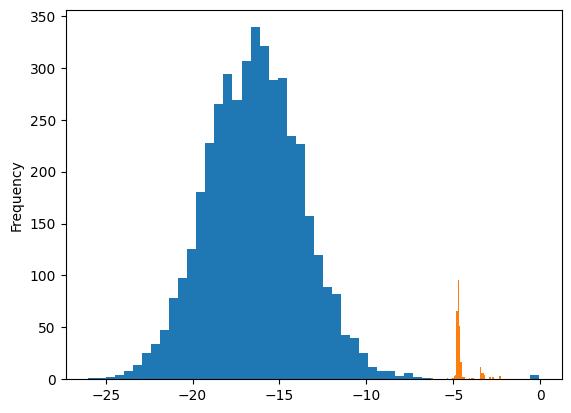

In [310]:
import sklearn.mixture

identifying_spurious_correlations = pd.DataFrame({
    "group": sklearn.mixture.GaussianMixture(n_components=2).fit_predict(pd.Series(TOM.max(axis=0), index=df.index).apply(np.log).values.reshape(-1, 1)).tolist(),
    "max_log_corr": pd.Series(TOM.max(axis=0), index=df.index).apply(np.log)
})

identifying_spurious_correlations.groupby("group")["max_log_corr"].plot.hist(bins=50)

identifying_spurious_correlations.query("group == 1")["max_log_corr"].min()

In [ ]:
spurious_correlations = pd.Series(TOM.max(axis=0), index=df.index).apply(np.log).between(-5, -1)

TOM = TOM.loc[spurious_correlations, spurious_correlations]

Optimal number of clusters: 7 with Calinski-Harabasz score: 610.9641576881714


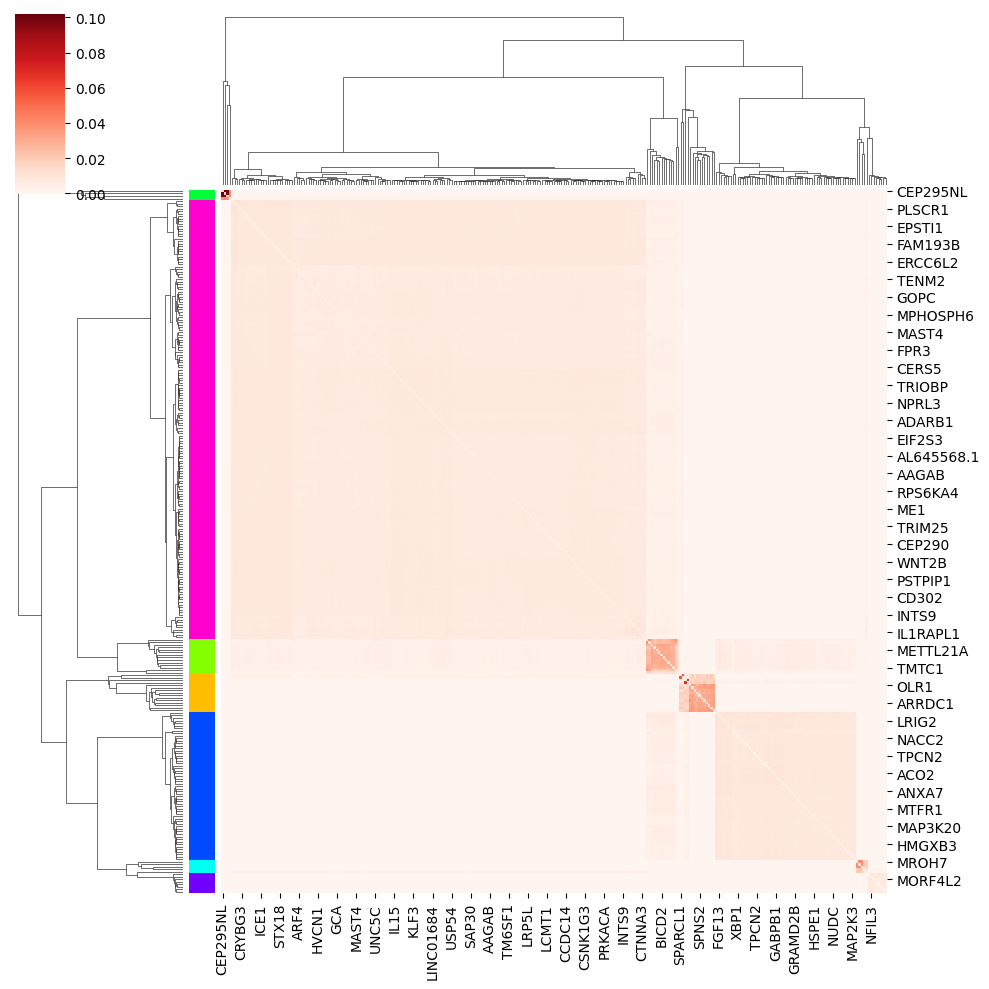

In [303]:
clustermap = sns.clustermap(
    TOM, 
    cmap="Reds", 
    metric="euclidean", 
    method="complete", 
    row_colors=utilities.labels_to_hex_colors(clustering.spectral_clustering_method(TOM))
)